# QUIZ PARA LA SIGUIENTE CLASE 24 DE FEBRERO

# PROYECTO MÓDULO 1

### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Madarme un correo con los nombres de los integrantes ya. Enviar correo a cristianz@iteso.mx hoy antes de las 8 pm
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para esta semana, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: 10 de Marzo de 2021 (10 minutos cada equipo).

# Ideas de proyectos:
### 1. Programación lineal: (con base en el libro Model building in mathematical programming de H. Paul Williams)

 + Planeación de mano de obra.
 + Planeación de producción.
 + Arbitraje usando programación lineal (Financiera) http://www.meiss.com/columbia/en/teaching/1999/fall/B6015/download/lecture05/lec5.pdf
 + Planta de tratamiento de aguas residuales de bajo costo (Ingeniería civil) Numerical Methods for Engineers pg 421
 + Problema de descubrir datos ocultos
 + Optimizar diseño de divisor de voltaje
 
### 2. Ajuste de curvas (con base en los datos en https://data.worldbank.org/indicator ó también en https://www.kaggle.com/datasets)

 + Histórico de temperaturas hasta 2016: ajuste de curvas y predicción de temperaturas de 2017 (comparación con datos reales).
 + Por ejemplo, CO2 emissions (kt), Forest area (sq. km), están relacionados con cambio climático. En las emisiones de CO2 parece que en los últimos años la curva tiene tendencia de concavidad hacia abajo, lo que indicaría que las políticas que se estén ejecutando si están teniendo un impacto.
 + Otro ejemplo puede ser Access to electricity (% of population). Se ve que está en constante crecimiento. Se podría estimar cuándo se llegará al 95%.
 
### 3. Cualquier problema de clasificación binaria (Regresión logística) (https://www.kaggle.com/datasets)

# Clasificación binaria

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://static.pexels.com/photos/616020/pexels-photo-616020.jpeg" width="400px" height="125px" />

> Lo que veremos en esta clase son aspectos básicos de lo que se conoce técnicamente con muchos nombres sofisticados: aprendizaje de máquina (machine learning), clasificación con redes neuronales (neural networks), entre otros.

**Referencia**
- https://es.coursera.org/learn/neural-networks-deep-learning
___

## 0. Motivación
Muchas aplicaciones de ingeniería se derivan de construir **modelos** para:
- predecir (clima, proyección de producción, toma de decisiones),
- diseñar (máquinas eléctricas, construcciones),
- entre otros.

Hasta hace unos quince años, la construcción de dichos modelos se hacía mayoritariamente con base en leyes basadas en una fuerte evidencia de la naturaleza (leyes de Newton, ecuaciones de Maxwell, leyes de la termodinámica, entre otras).

Sin embargo, en los últimos años, la gran cantidad de información disponible junto con el avance tecnológico en capacidad de procesamiento han llevado a que se construyan modelos con base en simplemente datos.

Ejemplos:
- Modelado de tráfico (waze/google maps).
- Modelos sociales (publicidad, diseño de estrategias de mercadeo).
- Modelos de... ¿personalidad?

Si lo anterior no les resulta sorprendente, los invito a que saquen veinte minutos y lean la siguiente [entrevista](http://www.theclinic.cl/2017/01/19/martin-hilbert-experto-redes-digitales-obama-trump-usaron-big-data-lavar-cerebros/).

Bueno, todo lo anterior es el poderoso alcance que tienen las tecnologías de la información. Hoy veremos un abrebocas: **construir un modelo de clasificación binaria con base en datos únicamente**.

## 1. Formulación del problema

### 1.1 Idea básica

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200px" height="70px" />

Presentamos la idea básica de clasificación binaria mediante un ejemplo.

Tenemos como *entrada* una imagen digital y como *salida* una etiqueta que identifica a esta imagen como el logo del ITESO (en cuyo caso la etiqueta toma el valor de uno '1') o no (en cuyo caso la etiqueta toma el valor de cero '0').

A la salida la denotaremos $y$.

**¿Cómo guarda las imágenes un computador?** Código de colores RGB.

<font color = red>
$$R=\left[\begin{array}{cccc}255 & 124 & \dots & 45\\ 235 & 224 & \dots & 135\\ \vdots & \vdots & & \vdots\\ 23 & 12 & \dots & 242\end{array}\right]$$
</font>
<font color = green>
$$G=\left[\begin{array}{cccc}255 & 154 & \dots & 42\\ 215 & 24 & \dots & 145\\ \vdots & \vdots & & \vdots\\ 0 & 112 & \dots & 232\end{array}\right]$$
</font>
<font color = blue>
$$B=\left[\begin{array}{cccc}255 & 231 & \dots & 145\\ 144 & 234 & \dots & 35\\ \vdots & \vdots & & \vdots\\ 5 & 52 & \dots & 42\end{array}\right]$$
</font>

Cada matriz tiene tamaño correspondiente con los pixeles de la imagen. Si la imagen se de $64px\times 64px$, cada matriz será de $64\times 64$.

**¿Cómo podemos convertir entonces una imagen en una entrada?** Ponemos cada valor de cada matriz en un vector de características $\boldsymbol{x}$:

$$\boldsymbol{x}=\left[\begin{array}{ccc} \text{vec}R & \text{vec}G & \text{vec}B \end{array}\right]^T=\left[\begin{array}{ccccccccc} 255 & 124 & \dots & 255 & 154 & \dots & 255 & 231 & \dots \end{array}\right]^T$$

Entonces el problema de clasificación se puede resumir como dado un vector de entrada $\boldsymbol{x}$ (en este caso un vector con las intensidades de rojo, verde y azul por pixel de una imagen), predecir si la etiqueta correspondiente $y$ toma el valor de $1$ o $0$ (si es logo del ITESO o no).

### 1.2 Notación
En adelante seguiremos la siguiente notación.

Un ejemplo de entrenamiento se representa por la pareja ordenada $(\boldsymbol{x},y)$, donde $\boldsymbol{x}\in\mathbb{R}^n$ y $y\in\left\lbrace0,1\right\rbrace$.

Tendremos $m$ ejemplos de entrenamiento, de modo que nuestro conjunto de entrenamiento será $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$.

Por otra parte, para presentar de forma más compacta las entradas de entrenamiento, definimos la matriz

$$\boldsymbol{X}=\left[\begin{array}{c} {\boldsymbol{x}^1}^T \\ {\boldsymbol{x}^2}^T \\ \vdots \\ {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times n},$$

cuyas filas son los vectores de entrenamiento de entrada transpuestos, y el vector

$$\boldsymbol{Y}=\left[\begin{array}{c} y^1 \\ y^2 \\ \vdots \\ y^m \end{array}\right]\in\mathbb{R}^{m},$$

cuyas componentes son las etiquetas (salidas) de entrenamiento.

## 2. Regresión logística

La idea entonces es, dado un vector de características $\boldsymbol{x}$ (quizá correspondiente a una imagen que queramos identificar como el logo del ITESO o no), queremos obtener una predicción $\hat{y}$ que es nuestro estimado de $y$.

Formalmente $\hat{y}=P(y=1|\boldsymbol{x})\in\left[0,1\right]$...

Los parámetros de regresión serán $\boldsymbol{\beta}=\left[\beta_0\quad \beta_1\quad \dots\quad \beta_n \right]^T\in\mathbb{R}^{n+1}.$

**Primera idea:** usar una regresor lineal 

$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_nx_n=\left[1\quad \boldsymbol{x}^T\right]\boldsymbol{\beta}=\boldsymbol{x}_a^T\boldsymbol{\beta},$$

donde $\boldsymbol{x}_a=\left[1\quad \boldsymbol{x}^T \right]^T\in\mathbb{R}^{n+1}$. 

¿Cuál es el problema? Que el producto punto $\boldsymbol{\beta}^T\boldsymbol{x}_a$ no está entre $0$ y $1$.

**Entonces,** pasamos el regresor lineal por una sigmoide (función logística)

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Función sigmoide
def sigmoide(z):
    sigma = 1/(1+np.exp(-z))
    return sigma

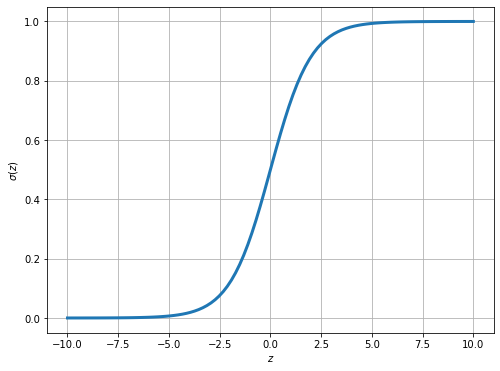

In [3]:
# Gráfica
znum = np.linspace(-10,10,100)
ynum = sigmoide(znum)

plt.figure(figsize=(8,6))
plt.plot(znum, ynum, lw=3)

plt.xlabel('$z$')
plt.ylabel('$\sigma(z)$')

plt.grid()
plt.show()

Notamos que:
- Si $z$ es grande, $\sigma(z)=1$.
- Si $-z$ es grande, $\sigma(z)=0$.
- $\sigma(0)=0.5$.

Finalmente...

**Regresor logístico:** 

$$\hat{y}=\sigma(\boldsymbol{x}_a^T\boldsymbol{\beta})$$

Para manejar todos los datos de entrenamiento, se define la matriz

$$\boldsymbol{X}_a=\left[\boldsymbol{1}_{m\times 1}\quad \boldsymbol{X}\right]=\left[\begin{array}{cc} 1 & {\boldsymbol{x}^1}^T \\ 1 & {\boldsymbol{x}^2}^T \\ \vdots & \vdots \\ 1 & {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times (n+1)}.$$

Así,

$$\hat{\boldsymbol{Y}}=\left[\begin{array}{c} \hat{y}^1 \\ \hat{y}^2 \\ \vdots \\ \hat{y}^m \end{array}\right]=\sigma(\boldsymbol{X}_a\boldsymbol{\beta})$$

In [4]:
# Definir función de regresión logística
def regre_log(beta, X):
    m = X.shape[0]
    XA = np.append(np.ones((m,1)), X, axis=1)
    return 0.999*sigmoide(XA.dot(beta))

## 3. Funcional de costo
Ya que tenemos definida la forma de nuestro modelo clasificador, debemos **entrenar** los parámetros $\boldsymbol{\beta}$ con los ejemplos de entrenamiento.

Es decir, dados  $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$, queremos encontrar parámetros $\boldsymbol{\beta}$ tales que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})\approx y^i$ 'lo mejor posible'.

Esto lo plantearemos como un problema de optimización.

**Primera idea:** minimizar error cuadrático $\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m (\hat{y}^i-y^i)^2$. Problema de optimización *no convexo* (explicar).

<img style="float: left; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/648/1*6EIZU5RiHx_Um_p-Zuh4Sw.png" width="470px" height="135px" />

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/300/1*3o9_XoQP4TaceYPRZVHlxg.png" width="450px" height="135px" />



**Alternativa:** entonces, se buscó una función de modo que el problema de optimización fuera convexo. Esta es:

$$\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m -\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$$

No pretendemos explicar toda esta función. Pero sí podemos ganar algo de intuición de porqué la usamos. Fijemos un $i$ dentro del sumatorio y consideremos el término $-\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$.

- Si $y^i=1$, entonces lo que queremos minimzar es $-\log(\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más grande posible, osea $1=y^i$.
- Si $y^i=0$, entonces lo que queremos minimzar es $-\log(1-\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más pequeño posible, osea $0=y^i$.

En cualquier caso, esta función objetivo cumple con lo requerido.

## Ejemplo
El archivo `datos.csv`  contiene datos de puntajes de dos exámenes de admisión (1 y 2), y etiquetas de si el respectivo estudiante fue admitido o no a la universidad.

In [17]:
# Importar datos
import pandas as pd
data = pd.read_csv('datos.csv', header=None)
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [18]:
# separar los datos de entrada y salida
X = data.loc[:,[0,1]].values
y = data.loc[:,2].values

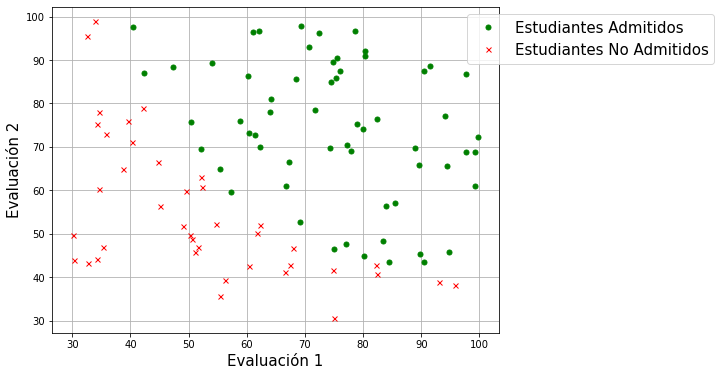

In [19]:
# Graficar puntos
# Tamaño de la gráfica
plt.figure(figsize=(8,6))

# Graficar estudiantes admitidos y no admitidos
plt.plot(X[y==1,0], X[y==1,1], 'og', ms=5, label='Estudiantes Admitidos')
plt.plot(X[y==0,0], X[y==0,1], 'xr', ms=5, label='Estudiantes No Admitidos')


# Etiquetas de los ejes
plt.xlabel('Evaluación 1', fontsize=15)
plt.ylabel('Evaluación 2', fontsize=15)

plt.legend(bbox_to_anchor=(1.5,1), fontsize=15)
plt.grid()
plt.show()

Construir un clasificador binario por regresión lineal logística.

In [20]:
# Libreria de optimización
import scipy.optimize as opt

$$\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m -\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$$

In [21]:
# Función objetivo
def obj(beta, X, y):
    m = X.shape[0]
    yhat = regre_log(beta, X)
    return -np.sum((y*np.log10(yhat) + (1-y)*np.log10(1-yhat)))/m

beta_inicial = np.zeros(3)

In [22]:
# resultado
sol = opt.minimize(obj,beta_inicial, args=(X,y))
sol

      fun: 0.0885106559644067
 hess_inv: array([[ 7.10459190e+03, -5.80732986e+01, -5.66398954e+01],
       [-5.80732986e+01,  5.07727008e-01,  4.33737616e-01],
       [-5.66398954e+01,  4.33737616e-01,  4.86083232e-01]])
      jac: array([ 1.11758709e-08,  2.17370689e-06, -1.19395554e-06])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.20982977,   0.20672174,   0.20184034])

Los parámetros del clasificador son entonces:

In [11]:
sol
beta = sol.x
beta

array([-25.20982977,   0.20672174,   0.20184034])

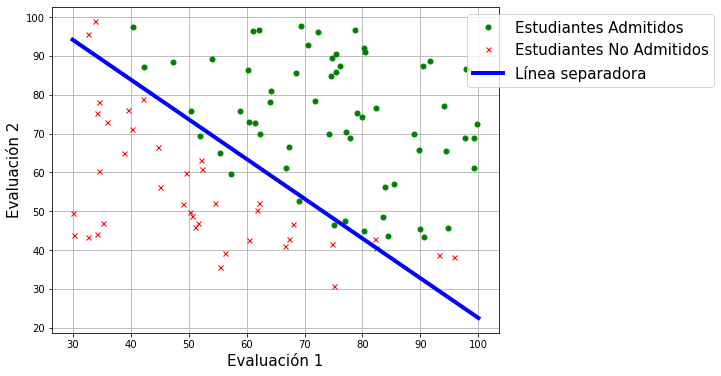

In [23]:
# Definir línea separadora
x1num = np.linspace(30,100,60)
x2num = (-beta[0]-beta[1]*x1num)/beta[2]


# Graficar puntos
# Tamaño de la gráfica
plt.figure(figsize=(8,6))

# Graficar estudiantes admitidos y no admitidos
plt.plot(X[y==1,0], X[y==1,1], 'og', ms=5, label='Estudiantes Admitidos')
plt.plot(X[y==0,0], X[y==0,1], 'xr', ms=5, label='Estudiantes No Admitidos')
plt.plot(x1num, x2num, 'b', lw=4, label='Línea separadora')

# Etiquetas de los ejes
plt.xlabel('Evaluación 1', fontsize=15)
plt.ylabel('Evaluación 2', fontsize=15)

plt.legend(bbox_to_anchor=(1.5,1), fontsize=15)
plt.grid()
plt.show()

## TAREA

El dataset `bdiag.csv` incluye detalles de imágenes de algunos pacientes que se han hecho una bipsia para el cáncer de seno. La variable `diagnosis` clasifica la biopsia como 1 = Benigno, 0 = Maligno.

Diseñe un clasificador binario por regresión logística.

Mostrar el gráfico de la división del clasificador con los puntos de entrenamiento.

### ENTREGABLE:
Crear un nuevo cuaderno de jupyter y nombrarlo T5PrimerNombrePrimerApellido.ipynb.

### DEFINIR FECHA DE ENTREGA

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('bdiag.csv')
data

,radius_mean,texture_mean,diagnosis
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0
...,...,...,...
194,14.86,23.21,0
195,12.91,16.33,1
196,13.77,22.29,0
197,18.08,21.84,0


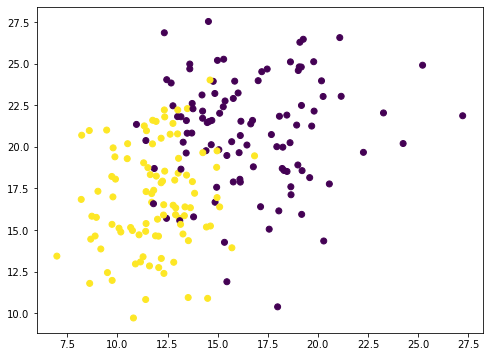

In [14]:
X = data.iloc[:,:2].values
Y = data.iloc[:,2].values


plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

### Fecha de entrega tarea 5: viernes 5 de marzo a las 23:55